# Lasso-Regression

Lasso Regression = Linear-Regression with L1-Regularization
Helps in preventing Overfitting of data

## Cost Function

`J(lasso)=MSE + lambda*sum(|wts|)/2m`

## Gradient Descent

    if w[i]<0:

        dw[i]=(-(2*(X[:,i]).dot(y - Y_prediction)) + self.regularization_parameter) / m

    else:

        (-(2*(X[:,i]).dot(y - Y_prediction)) - self.regularization_parameter) / m



    db=np.sum(y-y_prediction)


In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(context='notebook', style='darkgrid',palette='dark', font_scale=1.2)
%matplotlib inline


In [104]:
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [105]:
X,y=load_boston(return_X_y=True)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [107]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [108]:
class LassoRegression:
    def __init__(self, learning_rate=0.01, num_iter=1000, regularization_parameter=0.01):
        self.learning_rate = learning_rate
        self.regularization_parameter = regularization_parameter
        self.num_iter = num_iter

    def fit(self, X, y):
        def updateWtsAndBias(X, y):
            m, n = X.shape
            Y_prediction = self.predict(X)

            # -------- LOOPING Approch --------->
            # # gradient for weight
            # dw = np.zeros(n)
            # for i in range(n):
            #     if self.wts[i]>0:
            #         dw[i] = (-(2*(X[:,i]).dot(y - Y_prediction)) + self.regularization_parameter) /m 
            #     else :
            #         dw[i] = (-(2*(X[:,i]).dot(y - Y_prediction)) - self.regularization_parameter) /m
            # # gradient for bias
            # db = - 2 * np.sum(y - Y_prediction) / m

            
            # -------- Vectorization Approch --------->
            sign=self.regularization_parameter*np.sign(self.wts)
            dw=(1/m)*(np.dot(X.T,Y_prediction-y)+sign)
            db=(1/m)*np.sum(Y_prediction-y)

            self.wts -= self.learning_rate*dw
            self.bias -= self.learning_rate*db

        m, n = X.shape
        self.wts = np.random.randn(n)
        self.bias = 0

        for _ in range(self.num_iter):
            updateWtsAndBias(X, y)

    def predict(self, X):
        y_pred = np.dot(X, self.wts.T)+self.bias
        return y_pred

In [109]:
my_model = LassoRegression()
my_model.fit(X_train_scaled, y_train)
y_pred = my_model.predict(X_test_scaled)
y_pred

array([26.14824618, 22.8675355 , 24.10721602, 20.65331638, 18.92029247,
       28.92326282, 15.3772227 , 20.11132431, 26.48613076, 23.82051003,
       26.80191377, 17.81989468, 27.64548767, 27.39520029, 21.06773331,
       17.51185768, 12.64785158, 32.56765301, 25.11580265, 29.92806303,
       35.86491949, 21.98270255, 19.81028593, 28.83382732, 28.71266375,
       32.04080035, 30.90443382, 34.118224  , 26.92310737, 25.22866262,
       17.13174159, 41.27735493, 25.28472112, 21.29004799, 24.06747204,
       14.78188188, 16.17312234, 14.64862915, 19.10475902, 24.26432001,
       30.41531007, 19.02208658, 27.10105038, 30.89170535, 20.35674528,
       24.68186523,  6.10414845, 14.20670863, 17.97556047, 21.5928455 ,
       21.34491309, 19.85109069, 25.38744179, 19.32606738, 22.08924123,
       13.10324884, 23.21120718, 17.74704649, 25.07308196, 24.23409457,
       34.84494838, 26.12445715, 32.75659449, 18.2763385 , 20.54205314,
       13.21901611, 13.75238246, 21.83250958, 18.34009311, 28.33

Text(0.5, 1.0, 'Predicted-Values')

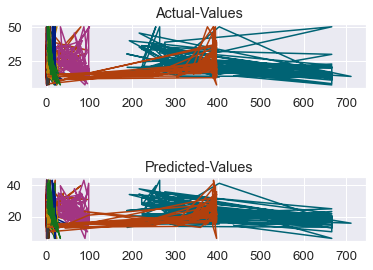

In [110]:
plt.subplot(3, 1, 1)
plt.plot(X_test, y_test)
plt.title("Actual-Values")


plt.subplot(3, 1, 3)
plt.plot(X_test, y_pred)
plt.title("Predicted-Values")

In [111]:
my_mse = mean_squared_error(y_test, y_pred)
my_r2 = r2_score(y_test, y_pred)

print("My Mean Squared Error: ", my_mse)
print("My R-squared: ", my_r2)

My Mean Squared Error:  20.990848856990837
My R-squared:  0.7413806791858508
